In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [2]:
#The following CSV file compiles all the differentially expressed genes per cell type from Logistic Regression analysis. 
#Corrected for preterm/labor genes & other covariates as discussed in the Methods. 
data= pd.read_csv('PE_markers_stripplot_050422.csv', index_col= 'gene')
data.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cell_type,origin
gene,,,,,,,
FLT1,0.000000e+00,2.702766,0.764,0.503,0.000000e+00,vSCT1,villi
HTRA4,0.000000e+00,2.684539,0.551,0.058,0.000000e+00,vSCT1,villi
LEP,0.000000e+00,1.997777,0.309,0.032,0.000000e+00,vSCT1,villi
SPECC1L,2.870000e-262,1.635219,0.351,0.003,7.510000e-258,vSCT1,villi
MFSD4B,1.460000e-67,1.576329,0.352,0.072,3.830000e-63,vSCT1,villi


In [4]:
#Case-I: Take a cut-off of 0.05
data_deg= data[data['p_val_adj'] < 0.05]

#Number of DEG(s) per cell type:
data_deg.groupby('cell_type').size().sort_values(ascending=False)

cell_type
vSCT1        725
dLEC         631
vSCT2        576
dMAC1        485
DSC1         442
vVCT         349
dNK1         250
vHBC         210
vVEC         163
dTcell       152
vSCTjuv      141
vPAMM        129
dLECp        125
dMAC2        121
vTcell       108
dVEC         103
dNK2          88
dMono_LYZ     67
vMC           52
dSMC          33
vFB           24
dFB1          20
dFB2          18
DSC2          12
dtype: int64

In [5]:
data_deg.groupby(['cell_type', 'origin']).size().sort_values(ascending=False)

cell_type  origin 
vSCT1      villi      725
dLEC       decidua    631
vSCT2      villi      576
dMAC1      decidua    485
DSC1       decidua    442
vVCT       villi      349
dNK1       decidua    250
vHBC       villi      210
vVEC       villi      163
dTcell     decidua    152
vSCTjuv    villi      141
vPAMM      villi      129
dLECp      decidua    125
dMAC2      decidua    121
vTcell     villi      108
dVEC       decidua    103
dNK2       decidua     88
dMono_LYZ  decidua     67
vMC        villi       52
dSMC       decidua     33
vFB        villi       24
dFB1       decidua     20
dFB2       decidua     18
DSC2       decidua     12
dtype: int64

In [6]:
#Order the cell-types for the 'strip-plot': main fig.3A
#Keep Villi first followed by decidua. 
order= ['vSCT1', 'vSCT2', 'vVCT', 'vHBC', 'vVEC', 'vSCTjuv', 'vPAMM', 'vTcell', 'vMC', 'vFB',
       'dLEC', 'dMAC1', 'DSC1', 'dNK1', 'dTcell', 'dLECp', 'dMAC2', 'dVEC', 'dNK2', 'dMono_LYZ',
       'dSMC', 'dFB1', 'dFB2', 'DSC2']

#Define color codes a/c main fig.1B & 1C:
cols_list= ['#ff99cc', '#ff0080', '#00b3b3', '#fe6776', '#fd96A9', '#cc33ff', '#c0c999', '#a799b7','#63264a', '#dec1ff',
           '#ff66b3', '#b3b300', '#33ccff', '#006699', '#c2d6d6', '#99004d', '#4d4d00', '#9966ff', '#80d4ff', 
           '#004d00', '#000080', '#ffcc99', '#994d00', '#cc3300']

In [7]:
#Reorder the cell-types according to the most dysregulated within tissue.  
data_deg["cell_type"] = pd.Categorical(data_deg["cell_type"], categories = order)
data_deg= data_deg.sort_values(by = "cell_type")
data_deg.groupby('cell_type').size()

cell_type
vSCT1        725
vSCT2        576
vVCT         349
vHBC         210
vVEC         163
vSCTjuv      141
vPAMM        129
vTcell       108
vMC           52
vFB           24
dLEC         631
dMAC1        485
DSC1         442
dNK1         250
dTcell       152
dLECp        125
dMAC2        121
dVEC         103
dNK2          88
dMono_LYZ     67
dSMC          33
dFB1          20
dFB2          18
DSC2          12
dtype: int64

In [8]:
#Control the jitter size as preferred: 

def make_de_strip_plot(all_de):
    fig = plt.figure(figsize=[13,6])
    order= ['vSCT1', 'vSCT2', 'vVCT', 'vHBC', 'vVEC', 'vSCTjuv', 'vPAMM', 'vTcell', 'vMC', 'vFB',
       'dLEC', 'dMAC1', 'DSC1', 'dNK1', 'dTcell', 'dLECp', 'dMAC2', 'dVEC', 'dNK2', 'dMono_LYZ',
       'dSMC', 'dFB1', 'dFB2', 'DSC2']
    #order = all_de.cell_type.value_counts().index

    ax1 = sns.stripplot(data=all_de, 
              y='avg_log2FC', 
              x='cell_type', 
              order= None,
              jitter=True, 
              size=3,
              alpha=.8,
              palette= cols_list
              )
    plt.xticks(rotation=45, horizontalalignment="right");#rotation_mode="anchor");
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    #num_de_genes = all_de.groupby('cell_type').size().sort_values(ascending=False)
    num_de_genes= all_de.groupby('cell_type').size()
    ax2.hlines(num_de_genes, np.arange(len(order))-.4, np.arange(len(order))+.4, colors='k', linewidth=2)
    ax2.set_ylabel('Number of signficant PE vs lateC DEGs', color='k')  # we already handled the x-label with ax1
    
    for i,num in enumerate(num_de_genes):
        ax2.text(s=str(num), x=i, y=num+6, ha='center', fontsize='large', fontweight='bold')

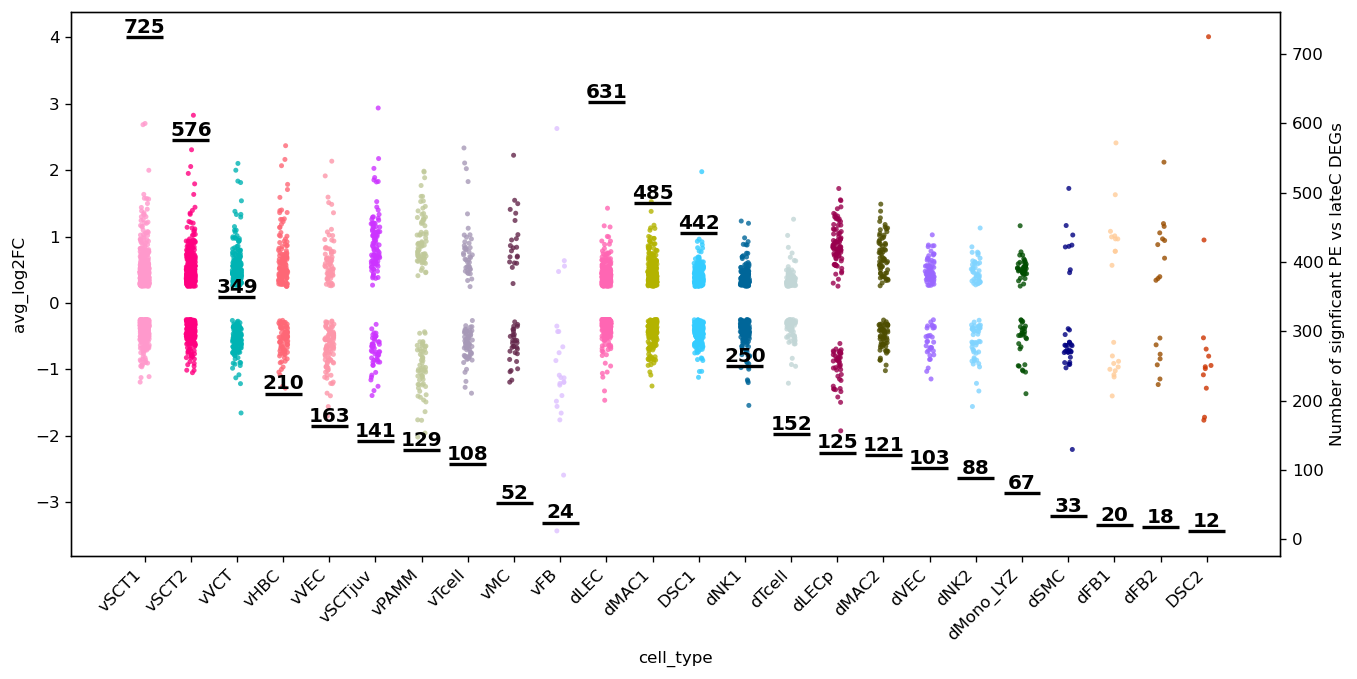

In [9]:
plt.rcParams['figure.dpi'] = 120
cg= make_de_strip_plot(data_deg)

#plt.savefig("PE_celltype_DEG_stripplot_v1.pdf")

In [10]:
#Create the strip-plot but without printing the total #DEGs: 
def make_de_strip_plot(all_de):
    fig = plt.figure(figsize=[13,6])
    
    order= ['vSCT1', 'vSCT2', 'vVCT', 'vHBC', 'vVEC', 'vSCTjuv', 'vPAMM', 'vTcell', 'vMC', 'vFB',
       'dLEC', 'dMAC1', 'DSC1', 'dNK1', 'dTcell', 'dLECp', 'dMAC2', 'dVEC', 'dNK2', 'dMono_LYZ',
       'dSMC', 'dFB1', 'dFB2', 'DSC2']
    #order = all_de.cell_type.value_counts().index

    ax1 = sns.stripplot(data=all_de, 
              y='avg_log2FC', 
              x='cell_type', 
              order= None,
              jitter=True, 
              size=3,
              alpha=.8,
              palette= cols_list)
    plt.xticks(rotation=45, horizontalalignment="right");#rotation_mode="anchor");
    
    ax2 = ax1.twinx() 

Significantly dysregulated expression profiles between late control (l.ctrl) and eoPE villous
and decidual cell types (Bonferroni adjusted two-sided, logistic regression p<0.05 and 
log2FC>± 0.25). Log2FC between conditions for each individually expressed genes (dot) is 
visualised. vCTBpf, vCCT, vCTBp, vEB, dBcell, dEpC, dNKp, dPC, dGranul, dEVT, dDSTB
excluded due to large cell-type composition changes between l.ctrl and eoPE.

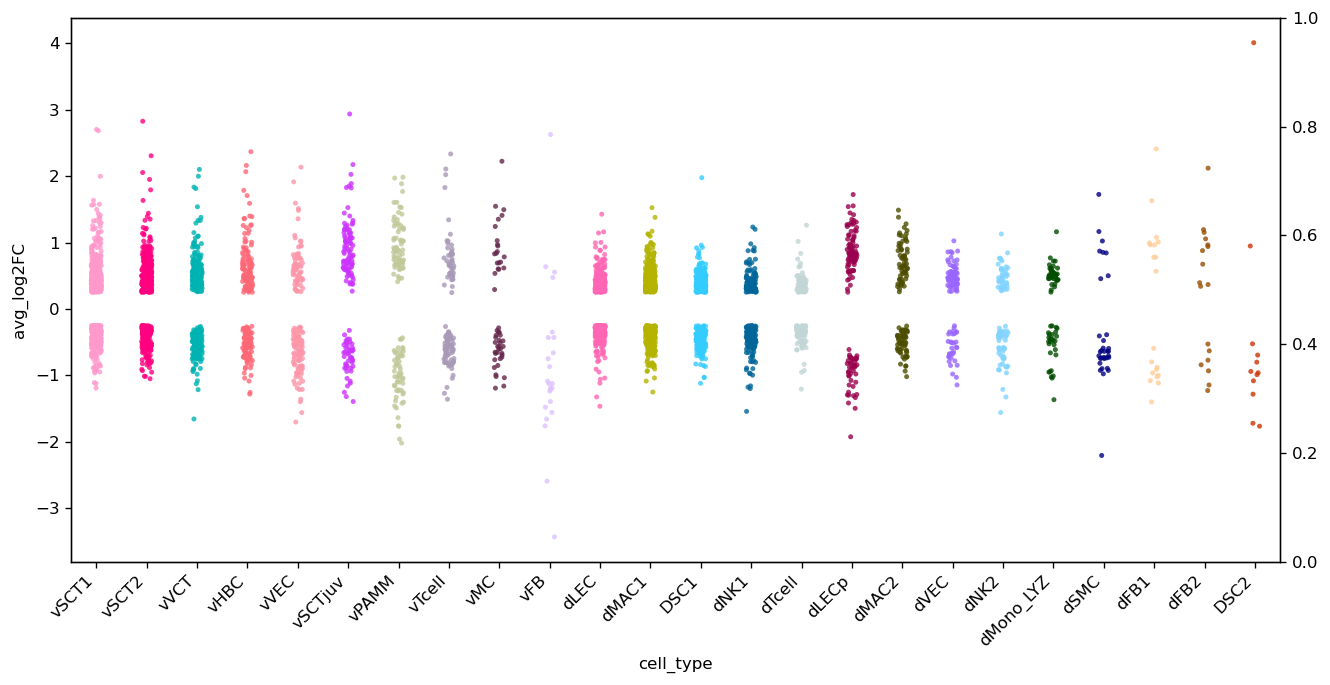

In [11]:
cg= make_de_strip_plot(data_deg)

#plt.savefig("PE_celltype_DEG_stripplot_adjpval0.05_v2.pdf", dpi=400)

In [12]:
#Number of upregulated DEGs: 
data_deg_up= data_deg[data_deg['avg_log2FC'] >= 0.25]

data_deg_up.groupby('cell_type').size().sort_values(ascending=False)

cell_type
vSCT1        434
vSCT2        361
dLEC         318
dMAC1        312
DSC1         247
vVCT         205
vHBC         126
dNK1         122
vSCTjuv       94
dLECp         82
dTcell        73
vPAMM         71
dVEC          71
vVEC          66
dMAC2         62
dNK2          42
vTcell        42
dMono_LYZ     39
vMC           21
dFB2          11
dFB1          10
dSMC           8
vFB            4
DSC2           2
dtype: int64

The cell type/states were renamed on Adobe Acrobat: 
vSCT= vSTB; vVCT= vCTB; dLECp = dLECP & dMono_LYZ= dMono1. 

Figure-3G: Heatmap illustrating fold changes in log2FC of EP300 dysregulated targets between eoPE and term controls groups for overlapping genes shown in 
(b) for STB n=11 villi (6 late control, 5 eoPE). Genes involved in fusion are marked in red,genes dysregulated in ≥ 2 STB groups, minimum logFC ≥ 0.4, gene expressed in ≥ 30% cells; 
n= 28, marked in black. Logistic Regression was used for differential testing (log2FC >= 0.25 
and p-value < 0.05 after adjustment for multiple testing)

In [13]:
plt.rcParams['figure.dpi'] = 90

In [14]:
plt.rcParams["font.family"] = "arial"

In [16]:
#Read the CSV enlisting DEG(s) for vSTB subgroups:
df_all= pd.read_csv('/dh-projects/preeclampsia_2022/analysis/placenta_atlas_2022/villi_scVI_harmonization/figure3_DEG_tests/figure3_updated_DEG_020622.csv')
df_all.head()

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cell_type
0,FLT1,0.0,2.826641,0.633,0.228,0.0,vSTB2
1,PAPPA2,0.0,2.307021,0.863,0.664,0.0,vSTB2
2,SAT1,0.0,2.054541,0.602,0.166,0.0,vSTB2
3,CGA,0.0,1.126908,0.830,0.615,0.0,vSTB2
4,SH3PXD2A,0.0,1.793199,0.719,0.209,0.0,vSTB2


In [17]:
#Pivot table: pick top genes dysregulated across "cell type:"
pe_heat= pd.pivot_table(df_all, values= 'avg_log2FC', 
                     index=['gene'], 
                     columns= 'cell_type')


pe_heat.head()

cell_type,vSTB1,vSTB2,vSTBjuv
gene,,,
AC026167.1,1.325013,1.334781,0.882045
AC087857.1,1.217389,1.085344,0.908767
ACER2,0.583127,0.924733,0.183512
ADAM12,0.444919,1.213966,-0.039006
AL031280.1,0.579992,0.767420,-0.135687


In [18]:
import csv

#Received from Daniela V: 
with open('./updated_files/Figure3_EP300_revised_lists.csv') as csvfile:
    rows = csv.reader(csvfile)
    res = list(zip(*rows))
    print(res)

[('gene_list1', 'FLT1', 'PAPPA2', 'SAT1', 'CGA', 'SH3PXD2A', 'AC026167.1', 'AC087857.1', 'ADAM12', 'PSG9', 'EBI3', 'FOS', 'HTRA1', 'ENG', 'PIK3CB', 'SERPINE1', 'RHOBTB1', 'ACER2', 'MIR193BHG', 'TBC1D22A', 'TESK2', 'RDH13', 'INHBA', 'C16orf74', 'TCF25', 'MIR503HG', 'PLIN2', 'MAN1C1', 'CALM1', 'AL031280.1', 'ST3GAL1', 'GADD45G', 'SNX9', 'FAM120A', 'SHANK2', 'EPS8L1', 'NAV1', 'KRT19', 'SLC43A2', 'MTMR4', 'SYNE2', 'MAFF'), ('gene_list2', 'FLT1', 'PAPPA2', 'SAT1', 'CGA', 'SH3PXD2A', 'AC026167.1', 'AC087857.1', 'FOS', 'HTRA1', 'ENG', 'PIK3CB', 'SERPINE1', 'ACER2', 'MIR193BHG', 'TBC1D22A', 'TESK2', 'RDH13', 'INHBA', 'C16orf74', 'MIR503HG', 'PLIN2', 'MAN1C1', 'AL031280.1', 'GADD45G', 'SNX9', 'FAM120A', 'SHANK2', 'NAV1', '', '', '', '', '', '', '', '', '', '', '', '', '')]


In [19]:
gene_list1= ['FLT1', 'PAPPA2', 'SAT1', 'CGA', 'SH3PXD2A', 'AC026167.1', 'AC087857.1', 'ADAM12', 'PSG9', 'EBI3', 'FOS', 'HTRA1', 'ENG', 'PIK3CB', 'SERPINE1', 'RHOBTB1', 'ACER2', 'MIR193BHG', 'TBC1D22A', 'TESK2', 'RDH13', 'INHBA', 'C16orf74', 'TCF25', 'MIR503HG', 'PLIN2', 'MAN1C1', 'CALM1', 'AL031280.1', 'ST3GAL1', 'GADD45G', 'SNX9', 'FAM120A', 'SHANK2', 'EPS8L1', 'NAV1', 'KRT19', 'SLC43A2', 'MTMR4', 'SYNE2', 'MAFF']
gene_list2= ['FLT1', 'PAPPA2', 'SAT1', 'CGA', 'SH3PXD2A', 'AC026167.1', 'AC087857.1', 'FOS', 'HTRA1', 'ENG', 'PIK3CB', 'SERPINE1', 'ACER2', 'MIR193BHG', 'TBC1D22A', 'TESK2', 'RDH13', 'INHBA', 'C16orf74', 'MIR503HG', 'PLIN2', 'MAN1C1', 'AL031280.1', 'GADD45G', 'SNX9', 'FAM120A', 'SHANK2', 'NAV1']

#Subset the above gene set first:
data01= pe_heat.loc[gene_list1, :] 
data02= pe_heat.loc[gene_list2, :] 

len(data02)

28

In [20]:
#Read the EP300 fusion only gene list: 
fusion_list = pd.read_csv('EP300_fusion_only_080622.csv', index_col= 'gene')
fusion_list.index.values

array(['CYP11A1', 'CGA', 'GCM1', 'TRIM25', 'ADAM12', 'DYSF', 'ARHGAP42',
       'LEP', 'FLT1', 'PSG9', 'FSTL3', 'HTRA4', 'SASH1', 'FURIN', 'ENG',
       'ERVFRD-1', 'HTRA1', 'SH3PXD2A', 'FOS', 'DUSP1', 'GULP1', 'JUND',
       'FBN2', 'QSOX1', 'OAZ1', 'KRT19', 'EBI3'], dtype=object)

In [21]:
EP300_concat_list= pd.concat([data02, fusion_list]).drop_duplicates()
EP300_concat_list.index.values

array(['FLT1', 'PAPPA2', 'SAT1', 'CGA', 'SH3PXD2A', 'AC026167.1',
       'AC087857.1', 'FOS', 'HTRA1', 'ENG', 'PIK3CB', 'SERPINE1', 'ACER2',
       'MIR193BHG', 'TBC1D22A', 'TESK2', 'RDH13', 'INHBA', 'C16orf74',
       'MIR503HG', 'PLIN2', 'MAN1C1', 'AL031280.1', 'GADD45G', 'SNX9',
       'FAM120A', 'SHANK2', 'NAV1', 'CYP11A1', 'GCM1', 'TRIM25', 'ADAM12',
       'DYSF', 'ARHGAP42', 'LEP', 'PSG9', 'FSTL3', 'HTRA4', 'SASH1',
       'FURIN', 'ERVFRD-1', 'DUSP1', 'GULP1', 'JUND', 'FBN2', 'QSOX1',
       'OAZ1', 'KRT19', 'EBI3'], dtype=object)

In [23]:
#Conceptually, we will show a break heatmap with 28 genes on top & then, put a gap and put the 7 fusogenic genes down. 
gene_list_final= ['FLT1', 'AC026167.1', 'AC087857.1', 'HTRA1', 'ENG', 'FAM120A', 'INHBA', 'PLIN2', 'FOS',
            'PIK3CB', 'SERPINE1', 'MIR503HG', 'RDH13', 'TBC1D22A',  
             'MAN1C1', 'GADD45G', 'NAV1', 'SNX9', 'SHANK2', 'TESK2', 'AL031280.1',
            'ACER2', 'C16orf74', 'PAPPA2', 'SAT1', 'SH3PXD2A', 'CGA', 'ERVFRD-1', 'ADAM12', 'TRIM25', 'CYP11A1', 'GCM1', 'DYSF']


#Rearrange the order of features to be plotted on heatmap: 
heatmap= EP300_concat_list.loc[gene_list_final, :] 
heatmap.index.values

array(['FLT1', 'AC026167.1', 'AC087857.1', 'HTRA1', 'ENG', 'FAM120A',
       'INHBA', 'PLIN2', 'FOS', 'PIK3CB', 'SERPINE1', 'MIR503HG', 'RDH13',
       'TBC1D22A', 'MAN1C1', 'GADD45G', 'NAV1', 'SNX9', 'SHANK2', 'TESK2',
       'AL031280.1', 'ACER2', 'C16orf74', 'PAPPA2', 'SAT1', 'SH3PXD2A',
       'CGA', 'ERVFRD-1', 'ADAM12', 'TRIM25', 'CYP11A1', 'GCM1', 'DYSF'],
      dtype=object)

In [25]:
print(heatmap.values.min()) 
print(heatmap.values.max()) 

-0.461667884
2.826640805


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


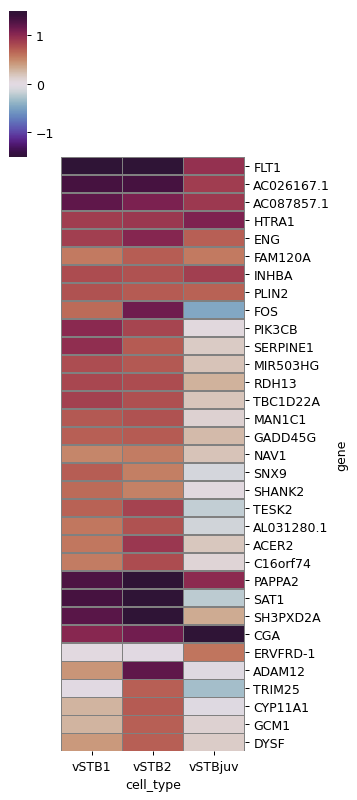

In [27]:
ax= sns.clustermap(heatmap, yticklabels=True,  vmax=1.5, vmin= -1.5, 
                  col_cluster=False, figsize= (4,9), row_cluster=False, 
                  center=0, linecolor='grey', linewidth=0.3,
                  cmap= 'twilight_shifted')

In [28]:
#Plot a heatmap with NA(s) masked:
#Read CSV where NA values are marked. 
df_all= pd.read_csv('PE_markers_stripplot_050422.csv')

#Pivot table: pick top genes dysregulated across "cell type:"
pe_heat= pd.pivot_table(df_all, values= 'avg_log2FC', 
                     index=['gene'], columns= 'cell_type')

#Subset only vSCT1/2 & vSCTjuv: 
pe_heat = pe_heat[[ 'vSCT1', 'vSCT2', 'vSCTjuv']]

#Subset by feature list: gene_list_final
data05= pe_heat.loc[gene_list_final, :] 
data05.index.values

array(['FLT1', 'AC026167.1', 'AC087857.1', 'HTRA1', 'ENG', 'FAM120A',
       'INHBA', 'PLIN2', 'FOS', 'PIK3CB', 'SERPINE1', 'MIR503HG', 'RDH13',
       'TBC1D22A', 'MAN1C1', 'GADD45G', 'NAV1', 'SNX9', 'SHANK2', 'TESK2',
       'AL031280.1', 'ACER2', 'C16orf74', 'PAPPA2', 'SAT1', 'SH3PXD2A',
       'CGA', 'ERVFRD-1', 'ADAM12', 'TRIM25', 'CYP11A1', 'GCM1', 'DYSF'],
      dtype=object)

In [29]:
mask_na = 0.000666
df= data05.fillna(mask_na)
df.head()

cell_type,vSCT1,vSCT2,vSCTjuv
gene,,,
FLT1,2.702766,2.826641,0.957534
AC026167.1,1.325013,1.334781,0.000666
AC087857.1,1.217389,1.085344,0.000666
HTRA1,0.879184,0.915218,1.073131
ENG,0.868664,1.032385,0.695782


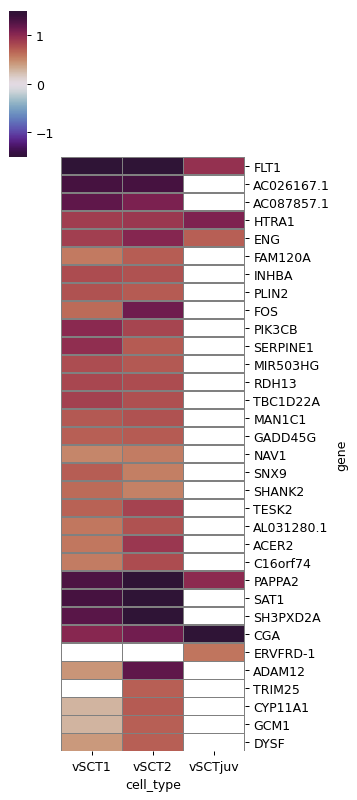

In [30]:
#Mask the NA values i.e., those cell types where a feature isn't a DEG would be masked. 
ax= sns.clustermap(df, mask=df == mask_na, yticklabels=True,  vmax=1.5, vmin= -1.5, 
                  col_cluster=False, figsize= (4,9), row_cluster=False, 
                  center=0, linecolor='grey', linewidth=0.3,
                  cmap= 'twilight_shifted')

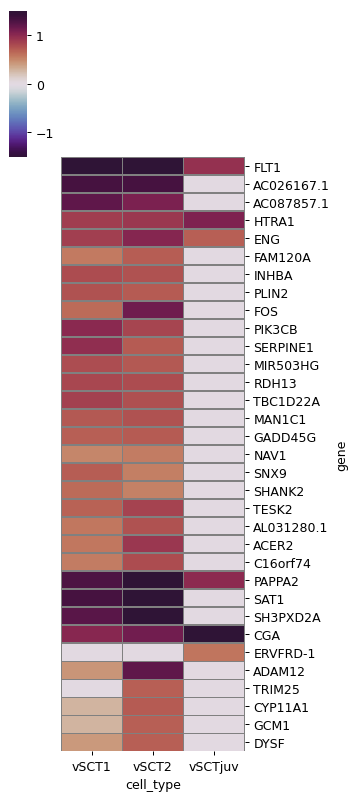

In [35]:
#colormap.set_bad("grey") 

sns.clustermap(df, mask=df.isnull(), yticklabels=True,  vmax=1.5, vmin= -1.5, 
            col_cluster=False, figsize= (4,9), row_cluster=False, center=0, linecolor='grey', linewidth=0.3,
            cmap= 'twilight_shifted')

#Grey cells are formated (NAs) on Adobe Illustrator. 